# Omoju Miller
# Project 2: Supervised Learning
### Building a Student Intervention System

## 1. Classification vs Regression

Your goal is to identify students who might need early intervention - which type of supervised machine learning problem is this, classification or regression? Why?

### Answer
This task sounds like a problem that would be best suited for a classification algorithm. The inherent task is to develop learners that can "predicting a category." If we look at the problem from another perspective, we can consider the student data available as a "labeled" dataset. We have features that we can use to determine who has succeeded in the class versus who has not. For that insight, we could use `passed` column as our class label. Therefore, this is a binary classification problem for predicting discrete labels that a student might belong to.

## 2. Exploring the Data

Let's go ahead and read in the student dataset first.


In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as pyplt


In [3]:
# Read student data
student_data = pd.read_csv("student-data.csv")
print "Student data read successfully!"
# Note: The last column 'passed' is the target/label, all other are feature columns

Student data read successfully!


Now, can you find out the following facts about the dataset?
- Total number of students
- Number of students who passed
- Number of students who failed
- Graduation rate of the class (%)
- Number of features

_Use the code block below to compute these values. Instructions/steps are marked using **TODO**s._

In [4]:
from __future__ import division

# TODO: Compute desired values - replace each '?' with an appropriate expression/function call
n_students = len(student_data)
n_features = len(student_data.columns) - 1
n_passed = len(student_data.query('passed == "yes"'))
n_failed = len(student_data.query('passed == "no"'))
grad_rate = float(n_passed) * 100 / n_students
print "Total number of students: {}".format(n_students)
print "Number of students who passed: {}".format(n_passed)
print "Number of students who failed: {}".format(n_failed)
print "Number of features: {}".format(n_features)
print "Graduation rate of the class: {:.2f}%".format(grad_rate) 

Total number of students: 395
Number of students who passed: 265
Number of students who failed: 130
Number of features: 30
Graduation rate of the class: 67.09%


## 3. Preparing the Data
In this section, we will prepare the data for modeling, training and testing.



### Preprocess feature columns

There are several non-numeric columns that need to be converted! Many of them are simply `yes`/`no`, e.g. `internet`. These can be reasonably converted into `1`/`0` (binary) values.

Other columns, like `Mjob` and `Fjob`, have more than two values, and are known as _categorical variables_. The recommended way to handle such a column is to create as many columns as possible values (e.g. `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc.), and assign a `1` to one of them and `0` to all others.

These generated columns are sometimes called _dummy variables_, and we will use the [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) function to perform this transformation.

In [5]:
# Preprocess feature columns
def preprocess_features(X):
    outX = pd.DataFrame(index=X.index)  # output dataframe, initially empty

    # Check each column
    for col, col_data in X.iteritems():
        # If data type is non-numeric, try to replace all yes/no values with 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no'], [1, 0])
        # Note: This should change the data type for yes/no columns to int

        # If still non-numeric, convert to one or more dummy variables
        if col_data.dtype == object:
            col_data = pd.get_dummies(col_data, prefix=col)  # e.g. 'school' => 'school_GP', 'school_MS'

        outX = outX.join(col_data)  # collect column(s) in output dataframe

    return outX

student_data = preprocess_features(student_data)
print "Processed feature columns ({}):-\n{}".format(len(student_data.columns), list(student_data.columns))


Processed feature columns (49):-
['school_GP', 'school_MS', 'sex_F', 'sex_M', 'age', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Medu', 'Fedu', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'passed']


### Identify feature and target columns
It is often the case that the data you obtain contains non-numeric features. This can be a problem, as most machine learning algorithms expect numeric data to perform computations with.

**Note**: For this dataset, the last column (`'passed'`) is the target or label we are trying to predict.

In [6]:
# Extract feature (X) and target (y) columns
feature_cols = list(student_data.columns[:-1])  # all columns but last are features
target_col = student_data.columns[-1]  # last column is the target/label
print "Feature column(s):-", feature_cols

print "Target column: {}".format(target_col)

X_all = student_data[feature_cols]  # feature values for all students
y_all = student_data[target_col]  # corresponding targets/labels
print "\nFeature values:-"
print X_all.head()  # print the first 5 rows

Feature column(s):- ['school_GP', 'school_MS', 'sex_F', 'sex_M', 'age', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Medu', 'Fedu', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']
Target column: passed

Feature values:-
   school_GP  school_MS  sex_F  sex_M  age  address_R  address_U  famsize_GT3  \
0          1          0      1      0   18          0          1            1   
1          1          0      1      0   17          0          1            1   
2          1          0      1      0   15          0          1    

### Split data into training and test sets

So far, we have converted all _categorical_ features into numeric values. In this next step, we split the data (both features and corresponding labels) into training and test sets.

In [7]:
# First, decide how many training vs test samples you want
num_all = student_data.shape[0]  # same as len(student_data)
num_train = 300  # about 75% of the data
num_test = num_all - num_train

In [8]:
from sklearn import cross_validation



def shuffle_split_data(X, y):
    """ Shuffles and splits data into 75% training and 25% testing subsets,
        then returns the training and testing subsets. """

    ### test_size is the percentage of events assigned to the test set
    ### (remainder go into training)
    
    X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.24)
    #StratifiedShuffleSplit(y, n_iter=10, test_size=0.24)
    


    # Return the training and testing data subsets
    return X_train, y_train, X_test, y_test




In [9]:
# TODO: Then, select features (X) and corresponding labels (y) for the training and test sets
# Note: Shuffle the data or randomly select samples to avoid any bias due to ordering in the dataset

# Test shuffle_split_data
try:
    X_train, y_train, X_test, y_test = shuffle_split_data(X_all, y_all)
    print "Successfully shuffled and split the data!"
except:
    print "Something went wrong with shuffling and splitting the data."


print "Training set: {} samples".format(X_train.shape[0])
print "Test set: {} samples".format(X_test.shape[0])
# Note: If you need a validation set, extract it from within training data

Successfully shuffled and split the data!
Training set: 300 samples
Test set: 95 samples


## 4. Training and Evaluating Models
Choose 3 supervised learning models that are available in scikit-learn, and appropriate for this problem. For each model:

- What is the theoretical O(n) time & space complexity in terms of input size?
- What are the general applications of this model? What are its strengths and weaknesses?
- Given what you know about the data so far, why did you choose this model to apply?
- Fit this model to the training data, try to predict labels (for both training and test sets), and measure the F<sub>1</sub> score. Repeat this process with different training set sizes (100, 200, 300), keeping test set constant.

Produce a table showing training time, prediction time, F<sub>1</sub> score on training set and F<sub>1</sub> score on test set, for each training set size.

Note: You need to produce 3 such tables - one for each model.

In [62]:
# Train a model
import time
from sklearn.metrics import f1_score

def train_classifier(clf, X_train, y_train):
    start = time.time()
    clf.fit(X_train, y_train)
    end = time.time()
    return end - start

# Predict on training set and compute F1 score

def predict_labels(clf, features, target):
    start = time.time()
    y_pred = clf.predict(features)
    end = time.time()
    return f1_score(target.values, y_pred), end - start #got rid of this variable inside f1_score, pos_label='yes'

In [63]:
# Train and predict using different training set sizes
def train_predict(clf, X_train, y_train, X_test, y_test):
    
    train_time = train_classifier(clf, X_train, y_train)
    
    F1_score_train, prediction_time_train = predict_labels(clf, X_train, y_train)
    F1_score_test, prediction_time_test = predict_labels(clf, X_test, y_test)
    
    return train_time, F1_score_train, F1_score_test, prediction_time_test



In [64]:
def print_Output_Table(clf, train_time, prediction_time, F1_score_train, F1_score_test):

    print "{:>53}".format(clf.__class__.__name__)
    print "{:>53}".format('Training set size')
    print "{:>30}{:>d}\t{:>d}\t{:>d}".format('',100,200,300)
    print "-"*55

    for i in range(1):
        print "{:30}{:.3f}\t{:.3f}\t{:.3f}".format('Training time (secs)',
                                           train_time[i], train_time[i+1], train_time[i+2])
        print "{:30}{:.3f}\t{:.3f}\t{:.3f}".format('Prediction time (secs)',
                                           prediction_time[i], prediction_time[i+1], prediction_time[i+2])
        print "{:30}{:.3f}\t{:.3f}\t{:.3f}".format('F1 score for training set',
                                          F1_score_train[i], F1_score_train[i+1],F1_score_train[i+2])
        print "{:30}{:.3f}\t{:.3f}\t{:.3f}".format('F1 score for test set',
                                          F1_score_test[i],F1_score_test[i+1],F1_score_test[i+2])

In [65]:

# Lets try incremements of 100, 200 and 300
def makeTable(clf, X_test, y_test):

    train_set_size = [0] * 3
    train_time = [0] * 3
    prediction_time = [0] * 3
    F1_score_train = [0] * 3
    F1_score_test = [0] * 3

    for i in xrange(100, 400, 100):
        (train_time[(i//100)-1], F1_score_train[(i//100)-1], 
         F1_score_test[(i//100)-1], prediction_time[(i//100)-1]) = train_predict(clf, 
                                                              X_train[:i], y_train[:i], X_test, y_test)
        train_set_size[(i//100)-1] = i


    print_Output_Table(clf, train_time, prediction_time, F1_score_train, F1_score_test)

### Dictionary of models to run
- Comparing the three models with the base model only.


In [66]:
from sklearn import tree
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score


models = {'DecisionTree': tree.DecisionTreeClassifier(),
          'SVC': svm.SVC(),
          'RandomForest': RandomForestClassifier()
         }

In [67]:

scores = [accuracy_score, precision_score, recall_score, f1_score]
score_list = []
model_score_list = []
model_name_list = []
    
for model_name, clf in models.iteritems():
# Fit model to the training data, and predict labels (for both training and test sets), and measure the F1 score. 
    train_classifier(clf, X_train, y_train)
    train_time, F1_score_train, F1_score_test, prediction_time_test = train_predict(clf, 
                                                                        X_train, y_train, X_test, y_test)
    makeTable(clf, X_test, y_test)

    print "\n"
   

                               RandomForestClassifier
                                    Training set size
                              100	200	300
-------------------------------------------------------
Training time (secs)          0.021	0.096	0.020
Prediction time (secs)        0.001	0.001	0.001
F1 score for training set     0.987	1.000	0.995
F1 score for test set         0.745	0.708	0.741


                               DecisionTreeClassifier
                                    Training set size
                              100	200	300
-------------------------------------------------------
Training time (secs)          0.001	0.001	0.002
Prediction time (secs)        0.000	0.000	0.000
F1 score for training set     1.000	1.000	1.000
F1 score for test set         0.713	0.712	0.754


                                                  SVC
                                    Training set size
                              100	200	300
--------------------------------------------------

## 5. Choosing the Best Model

- Based on the experiments you performed earlier, in 1-2 paragraphs explain to the board of supervisors what single model you chose as the best model. Which model is generally the most appropriate based on the available data, limited resources, cost, and performance?
- In 1-2 paragraphs explain to the board of supervisors in layman's terms how the final model chosen is supposed to work (for example if you chose a Decision Tree or Support Vector Machine, how does it make a prediction).
- Fine-tune the model. Use Gridsearch with at least one important parameter tuned and with at least 3 settings. Use the entire training set for this.
- What is the model's final F<sub>1</sub> score?

### Answer

For the problem of identifying students that need intervention, I would advice the board of supervisors to go with a **[%CLASSIFIER%]**. First, it is a relatively fast algorithm to train and predict. 



#### A look inside the dataset: *Determine* Evaluation Metric
- As we can see the dataset is quite unbalanced (number of passed students >> number of failed students) a relatively small .
- The data is unbalanced and that is why it is better to use F<sub>1</sub> instead of accuracy as our evaluation metric.

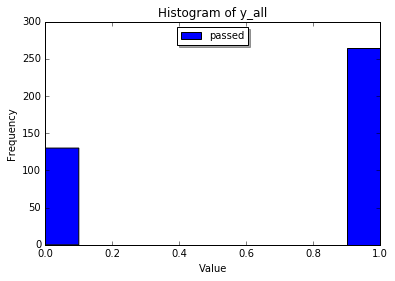

In [16]:
y_all.plot.hist()

_= pyplt.xlabel('Value')
_= pyplt.title('Histogram of y_all')
_= pyplt.legend(loc='upper center', shadow=True, fontsize='medium')
_= pyplt.axis([0, 1, 0, 300])


In [68]:
# TODO: Fine-tune your model and report the best F1 score
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer



# For an initial search, a logarithmic grid with basis
# 10 is often helpful. Using a basis of 2, a finer
# tuning can be achieved but at a much higher cost.

C_range = 10. ** np.arange(-3, 5)
gamma_range = 2. ** np.arange(-5, 1)

param_grid = dict(gamma=gamma_range, C=C_range)

f1_scorer = make_scorer(f1_score)
grid = GridSearchCV(svm.SVC(), param_grid=param_grid, scoring=f1_scorer)

grid.fit(X_train, y_train)

print("The best classifier is: ", grid.best_estimator_)






('The best classifier is: ', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.0625, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))


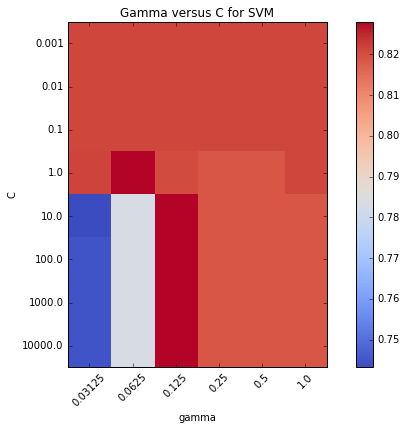

In [77]:
# grid_scores_ contains parameter settings and scores
score_dict = grid.grid_scores_

# We extract just the scores
scores = [x[1] for x in score_dict]
scores = np.array(scores).reshape(len(C_range), len(gamma_range))

# Make a nice figure
pyplt.figure(figsize=(10, 6))
pyplt.subplots_adjust(left=0.15, right=0.95, bottom=0.15, top=0.95)
pyplt.imshow(scores, interpolation='nearest', cmap=pyplt.cm.coolwarm)
pyplt.title('Gamma versus C for SVM')
pyplt.xlabel('gamma')
pyplt.ylabel('C')
pyplt.colorbar()
pyplt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
pyplt.yticks(np.arange(len(C_range)), C_range)
pyplt.show()



## Validating the Model


In [70]:
print "{:>33}".format(grid.__class__.__name__)
print "-"*35

print "{:30}{:.3f}".format('F1 score for training set' ,grid.score(X_train, y_train))
print "{:30}{:.3f}".format('F1 score for test set' ,grid.score(X_test, y_test))

                     GridSearchCV
-----------------------------------
F1 score for training set     0.946
F1 score for test set         0.772
